In [1]:
using Pkg
Pkg.activate("/Users/camillezaug/AMATH584")

 Activating environment at `~/AMATH584/Project.toml`


In [2]:
using Plots, LinearAlgebra, Images, LaTeXStrings, Netpbm, FileIO, ImageIO, ImageMagick, Statistics, StatsBase, Colors, Random

# Problem 1

## a) Find ground truth eigenvalues and eigenvectors

First, we create a symmetric matrix and find the eigenpairs.

In [129]:
Random.seed!(2)

A1 = rand(10,10)
A = 1/2*(A1+transpose(A1))
eigs = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -0.8040462826655319
 -0.4951514660103939
 -0.32766523803149805
 -0.20694100970443408
 -0.09600570767713257
  0.2500693222694338
  0.6538770345013699
  0.8300484372991049
  1.3177624248763533
  4.87639264903702
vectors:
10×10 Array{Float64,2}:
 -0.216036  -0.559632   -0.217227   …  -0.092717    -0.108343   -0.291756
 -0.201702   0.124304   -0.238143      -0.369942     0.245383   -0.307019
  0.111384  -0.248773   -0.275991       0.487592    -0.576601   -0.216359
  0.391735   0.302339    0.284338      -0.14625     -0.118036   -0.311242
  0.189549  -0.493034    0.35496        0.18413      0.531853   -0.376024
  0.188844   0.0831772   0.22347    …  -0.318221    -0.451464   -0.299392
  0.566099   0.190484   -0.432722       0.100646     0.211753   -0.337022
 -0.329482   0.125553   -0.417437      -0.239627     0.0412922  -0.327277
 -0.372061   0.0651114   0.447781      -0.00877004  -0.166495   -0.405

In [130]:
maxEig = maximum(eigs.values)

4.87639264903702

## b) Find the largest eigenvalue with the power iteration method

Below we implement the power iteration algorithm to find the max eigenvalue using the Rayleigh Quotient.

In [132]:
x = rand(10,1)
rayleighQuotient = 0

error = []

for n in 0:10
    
    Ax = A^n*x
    
    x = Ax/norm(Ax)
    
    rayleighQuotient = transpose(x)*A*x
    
    append!(error,abs(maxEig-rayleighQuotient[1]))

end

rayleighQuotient

1×1 Array{Float64,2}:
 4.87639264903702

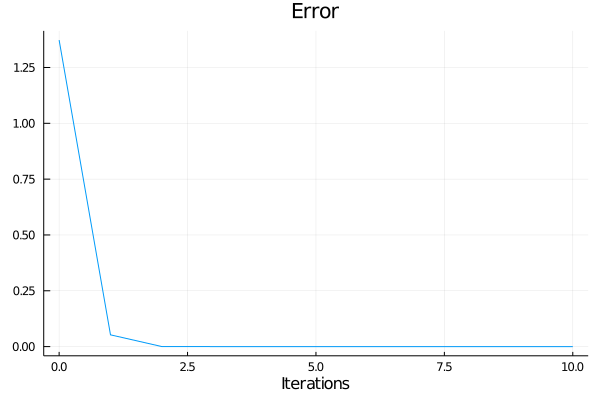

In [133]:
plot(0:10,error, legend = :none, xlabel = "Iterations", title = "Error")

The plot above shows the error between the actual largest eigenvalue and the largest eigenvalue found via iteration. 

As the number of iterations increase, the error drops rapidly. One reason the algorithm converges so quickly is that there is no eigenvalue close in size to the maximum eigenvalue. 

## c) Find all the eigenvalues by Rayleigh Quotient Iteration

Below we implement an algorithm for Rayleigh Quotient Iteration. 

When using this algorithm to find eigenvalues and eigenvectors, we choose guess new guess vectors that are orthogonal to all found eigenvectors to ensure convergence in the direction of a new eigenvalue. This works especially well for a symmetric matrix as all eigenvectors are orthogonal. 

In [134]:
function rayleighQuotientIteration(A,x,iterations) 
    # This function implements Rayleigh Quotient Iteration

    x = x/norm(x)
    
    lambda = x'*A*x

    for n in 1:iterations

        if cond(A- lambda[1]*I(10)) > 1e15 # Prevent more computations if the matrix is singular
            
            return lambda, x
            
        else
            
            w = (A-lambda[1]*I(10)) \ x

            x = w/norm(w)

            lambda = x'*A*x
            
        end
    end
    
     return lambda,x
end


rayleighQuotientIteration (generic function with 1 method)

In [135]:
function orthogonalize(x,Q)
    # This function orthogonalizes a vector against an existing orthogonal basis
    
    proj = zeros(10)
    
    for k in 1:size(Q)[2]
       
        v = Q[:,k]
            
        proj += (dot(x,v)/(norm(v))^2)*v
        
    end
    
    x -= proj
    
    x = x/norm(x)
    
    Q = hcat(Q,x)
    
    return x

end

orthogonalize (generic function with 1 method)

Here we execute the RQI algorithm 10 times to find the 10 eigenvalue/eigenvector pairs for our system.

In [136]:
error = Array{Float64,2}(undef,10,0)

for iterations in 1:20
    RQeigs = Array{Float64,2}(undef,1,0)
    RQvects = Array{Float64,2}(undef,10,0)

    x = rand(10)


    for i in 1:10

        lambda,v = rayleighQuotientIteration(A,x, iterations)

        lambda = lambda[1]

        # This counter keeps track of unique eigenvalues
        t = 0
        for k in RQeigs 
            if  abs(lambda - k) < 10e-6
                t+=1
            end
        end

        # If the eigenvalue has not been found before
        if t == 0
            RQeigs = hcat(RQeigs, lambda)
            RQvects = hcat(RQvects, v)
        end

        # Get a new guess vector orthogonal to all found eigenvectors

        x = rand(10,1)

        x = orthogonalize(x,RQvects)

    end

    # Compute the error between the RQI eigenvalues and the actual
    e = sort(RQeigs[:]) - eigs.values
    
    error = hcat(error,e)
    
end


We plot the results of the algorithm for different numbers of iterations. For all eigenvalues, the error rapidly and is approximately 0 before even 10 iterations occur. This is due to the cubic convergence of the RQI algorithm.

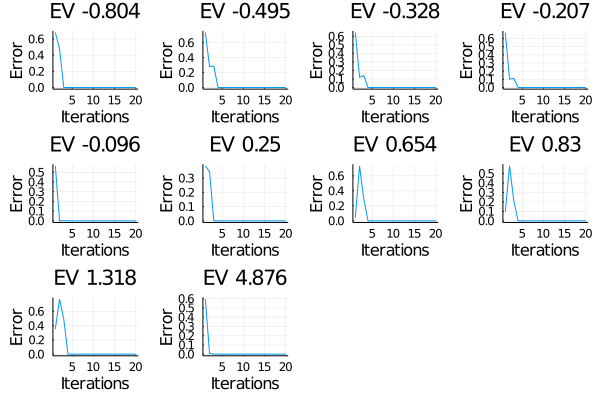

In [138]:
plots = []
for i in 1:10  
    
    push!(plots, plot(1:20, abs.(error[i,:]), ylabel = "Error", xlabel = "Iterations", legend = :none, title = string("EV ",round(eigs.values[i],digits = 3))))
end

plot(plots...)

## d) Repeat b) and c) with a random matrix that is not symmetric. Be sure to plot the eigenvalues in the complex plane

First we generate a random matrix which is not symmetric and find the eigenpairs. For a real matrix, if $\lambda$ is an eigenvalue, $\bar{\lambda}$ is as well. The absolute values of the eigenvalues are given below, with some duplicate values due to complex conjugate eigenvalues.


In [139]:
B = rand(10,10)
eigsB = eigen(B)
abs.(eigsB.values)

10-element Array{Float64,1}:
 0.9019129061610468
 0.4836641522822441
 0.4836641522822441
 0.2003483966430305
 0.027999492738056218
 0.4477503654970456
 0.4477503654970456
 0.8755359375890472
 0.8755359375890472
 5.027043843884024

In [141]:
maxEig =maximum(abs.(eigsB.values))

5.027043843884024

We perform power iteration to find the largest eigenvalue of the non-symmetric matrix.

In [143]:
x = rand(ComplexF64,10,1)
rayleighQuotient = 0

error = []

for n in 0:10
    
    Bx = B^n*x
    
    x = Bx/norm(Bx)
    
    rayleighQuotient = x'*B*x
    
    append!(error,abs(maxEig-rayleighQuotient[1]))

end

rayleighQuotient

1×1 Array{Complex{Float64},2}:
 5.027043843884023 + 0.0im

For the largest eigenvalue of a non-symmetric matrix, the power iteration algorithm still converges quickly. This is because in our matrix, the magnitude of the largest eigenvalue is much larger than the others.

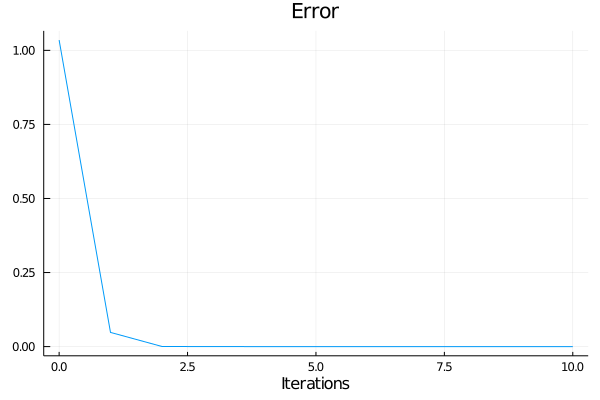

In [144]:
plot(0:10,error, legend = :none, xlabel = "Iterations", title = "Error")

However, it is more difficult to find all the eigenpairs of a non-symmetric matrix because most eigenvalues are complex conjugates of one another. There are some differences to the algorithm to account for these differences, such as starting with a complex guess. The convergence to an eigenvalue/eigenvector depends greatly on the initial guess, so we define the below function to easily perform many guesses. If all eigenvalues are not found, the process is repeated with a new guess.

In [170]:
function guessAndIterate(iterations)
    # Perform Rayleigh Quotient Iteration to find 10 unique eigenpairs
    
    RQeigs = Array{ComplexF64,2}(undef,1,0)
    RQvects = Array{ComplexF64,2}(undef,10,0)
    
    x = rand(Complex{Float64}, 10) ##
    
    for i in 1:10000

        lambda,v = rayleighQuotientIteration(B, x, iterations)

        lambda = lambda[1]

        t = 0
        for k in RQeigs 

            if  abs(lambda - k) < 10e-6
                t+=1
            end
        end

        if t == 0
            RQeigs = hcat(RQeigs, lambda)
            RQvects = hcat(RQvects, v)


        end

        # Find a vector orthogonal to x (this is the new guess)

        x = rand(Complex{Float64},10,1) ##

        x = orthogonalize(x,RQvects)

    end
    
    return RQeigs
    
end

guessAndIterate (generic function with 1 method)

We will find the eigenvalue/eigenvector pairs for different numbers of iterations (namely 20, 30, 40, 50, and 60 iterations).

In [256]:
eValues = Array{Float64,2}(undef,10,0)

for iterations in [20,30,40,50,60]

    RQeigs = guessAndIterate(iterations)
    
    while size(RQeigs)[2] < 10
        
        RQeigs = guessAndIterate(iterations)
    end
    
    
    RQeigs = sort(RQeigs, by = x -> (round(real(x), digits = 5), round(imag(x),digits = 5)),dims = 1)
    eValues = hcat(eValues,RQeigs[:])

end

Here we plot the real and imaginary parts of the eigenvalues as a function of the number of iterations performed. Past 20 iterations, the eigenvalues have converged well, so their convergence past 20 iterations (plotted below) seems constant. Before 20 iterations, however, due to error it is difficult to identify unique eigenvalues and too many unique eigenvalues are found, which is why we only show the results for more than 20 iterations. 

In [266]:
for i in 1:5
    eValues[:,i] = sort(eValues[:,i], by = x -> (round(real(x), digits = 5), round(imag(x),digits = 5)))
end

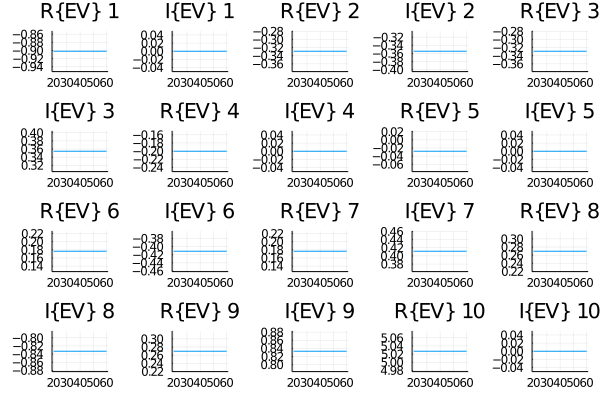

In [281]:

plots = []
for i in 1:10
    
    ev = eValues[i,:]

    push!(plots, plot([20,30,40,50,60], real(ev), ylim = (minimum(real(ev))-.05,maximum(real(ev))+0.05), legend = :none, title = string("R{EV} ", i)))
    push!(plots, plot([20,30,40,50,60], imag(ev), ylim = (minimum(imag(ev))-.05,maximum(imag(ev))+0.05), legend = :none, title = string("I{EV} ", i)))
end

plot(plots...)

# Problem 2

## a) Power iterate on the matrix of Yale Faces images to find the dominant eigenvector and eigenvalue. Compare it to the leading order SVD mode.

Below we read in the data and create a large matrix where each column is an image of a face.

In [3]:
path = "/Users/camillezaug/Desktop/AMATH 584/CroppedYale";
croppedYale = readdir(path);

In [4]:
# Extract the image date
# Create an array of arrays. Each entry will be a matrix corresponding to a single person.
# Each column of these matrices will correspond to an image
arrayArray = []
for faceDir in croppedYale
    singleFaceArray = []
    if !startswith(faceDir, ".")
        faces = readdir(string(path,"/",faceDir)) # All of the face .pgm images
        for face in faces
            if !startswith(face, ".")
                image = FileIO.load(string(path,"/",faceDir,"/",face))

                reshapedImage = reshape(Float64.(image),192*168)
                push!(singleFaceArray, reshapedImage)

            end
        end 
        push!(arrayArray, singleFaceArray)
    end
end

faceMatrix = []

for faceArray in arrayArray

    faceMatrix = vcat(faceMatrix, faceArray) # Combine each of the train sets for each face
    
end

faceMatrix = hcat(faceMatrix...);

Now we create a square correlation matrix of the data

In [52]:
A = faceMatrix'*faceMatrix;

First we perform power iteration on this correlation to find the dominant eigenpair. We print the value of the maximum eigenvalue below. After all the iterations are complete, `x` is the eigenvector.

In [109]:
x = rand(ComplexF64,size(A)[1],1)
rayleighQuotient = 0

error = []



for n in 0:10
    
    Ax = A^n*x
    
    x = Ax/norm(Ax)
    
    rayleighQuotient = x'*A*x
    

end

maxEV = rayleighQuotient

1×1 Array{Complex{Float64},2}:
 7.550936495884136e6 - 5.820766091346741e-11im

Now we find the largest SVD mode. Printed below is the square of this dominant mode.

In [105]:
svdImages = svd(faceMatrix);
maxSSquared = (maximum(svdImages.S))^2

7.55093649588414e6

The error (shown below) between the largest eigenvalue of the matrix $\mathbf{A}^*\mathbf{A}$ and the square of the largest SVD mode of $\mathbf{A}$ is very small. This is what we expect, as the nonzero singular values of $\mathbf{A}$ are the square roots of the nonzero eigenvalue of $\mathbf{A}^*\mathbf{A}$.

In [110]:
abs(maxSSquared-real(maxEV[1]))

3.725290298461914e-9

## b) Use random sampling to reproduce the SVD matrices $\mathbf{U}$, $\mathbf{\Sigma}$, $\mathbf{V}$

Here we write a method that performs random sampling for different values of $k$, where $k$ will be the rank of the approximation.

We randomly sample from the matrix of images using Gaussian test matrix, take a QR decomposition, project the transpose of the resulting $\mathbf{Q}$ matrix onto A, perform SVD, and then set $\mathbf{U} = \mathbf{Q}\tilde{\mathbf{U}}$ (from the approximate SVD).

In [156]:
function randomSVD(matrix, samples)
    k = samples
    n = size(matrix)[2]
    
    # Get random vectors
    Omega = randn(n,k)
    
    # Sample the original matrix
    AOmega = matrix*Omega
    
    # QR decomp (economy)
    F = qr(AOmega)
    Q = Array(F.Q)
    
    # Project Q^T onto A
    B = Q'*faceMatrix
    
    # Perform SVD
    Uapprox, Sapprox, Vtapprox = svd(B)
    
    U = Q*Uapprox 
    S = Sapprox
    V = Vtapprox
    
    return U, S, V
end

randomSVD (generic function with 1 method)

Now we perform a test of our method with $k = 20$. From visual inspection, both the first mode and the singular value decay of the approximation match somewhat well with the original.


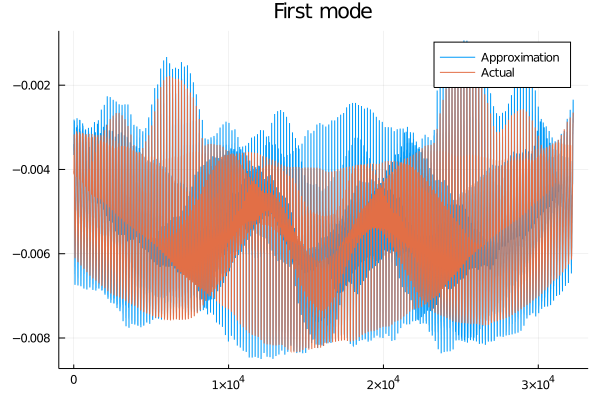

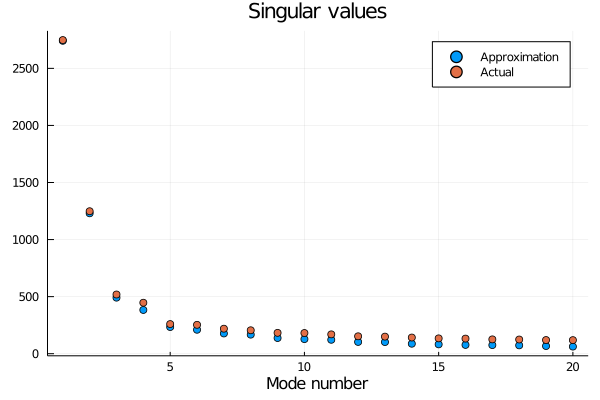

In [285]:
samples = 20

# Approximation
U, S, V = randomSVD(faceMatrix, samples);u = U[:,1]

# Actual values
uac = svdImages.U[:,1]
sac = svdImages.S

display(plot(1:size(u)[1],[u,uac], title = "First mode", label = ["Approximation" "Actual"]))
scatter(1:samples, [S[1:samples],sac[1:samples]], xlabel = "Mode number", title = "Singular values", label = ["Approximation" "Actual"])

## c) Compare the randomized modes to the true modes along with the singular value decay as a function of the number of randomized samples

We study the approximation as a function $k$, choosing values between 10 and 1000. 

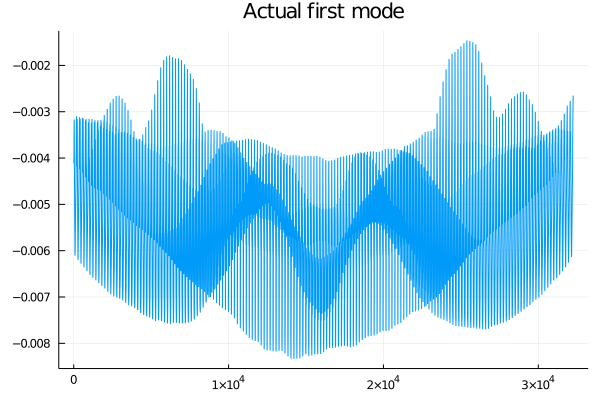

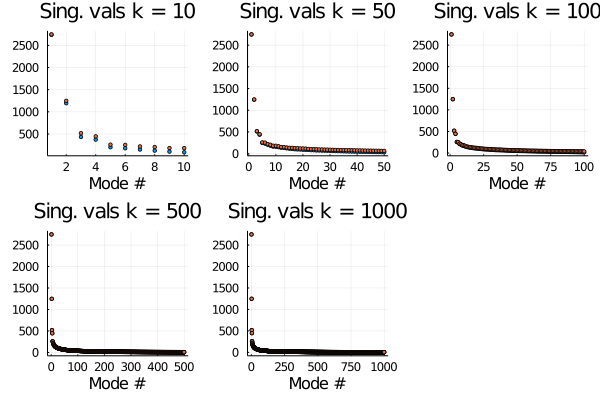

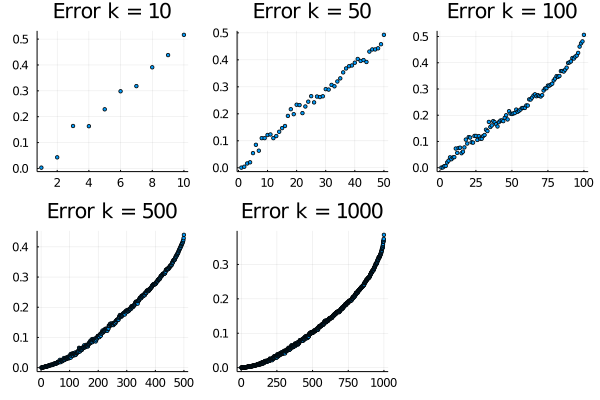

In [287]:
samples = [10, 50, 100, 500, 1000]
uac =svdImages.U[:,1]
sac = svdImages.S

uplots = []
splots = []
splots2 = []

display(plot(1:size(u)[1],uac, title = "Actual first mode",  legend = :none))

for k in samples
    
    U,S,V = randomSVD(faceMatrix, k)
    u = U[:,1]
    
    push!(uplots,plot(1:size(u)[1],u, title = string("Approx. k = ", k),  legend = :none))
    push!(splots,scatter(1:k, [S[1:k],sac[1:k]], markersize = 2,legend = :none, xlabel = "Mode #", title = string("Sing. vals k = ", k)))
    push!(splots2,scatter(1:k, abs.(S[1:k]-sac[1:k])./sac[1:k], markersize = 2, legend = :none,title = string("Error k = ", k)))
    
end

display(plot(uplots...))
display(plot(splots...))
plot(splots2...)

In the first set of plots, we see that the approximation of the dominant mode, while the sign may be off (something we saw in lecture caused by the randomness of the guess), appears to match the actual mode well when $k \approx 500$. The approximation improves as $k$ increases.

In the second set of plots, the decay of singular values appears to match the actual decay well when $k>50$ (the blue dots represent the approximation and the red dots represent the actual values). 

Finally, in the third set of plots, the relative error between the actual and approximated singular values shrinks as the $k$ increases. The dominant modes have lower error, so dominant modes are better approximated than weaker modes.